In [1]:
import numpy as np 
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA


from sklearn import linear_model
import sklearn.metrics as accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import Lasso as Lasso_Reg
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import statsmodels.api as sm

import scipy.stats as stats
import math
import json as j
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
#Upload the data

russia = pd.read_stata('Russia_Raw.dta')
df = pd.DataFrame(russia)


In [3]:
#rename the dataframe and drop raw text data

cols_to_drop = ['industry_descr', 'broad_sector', 'country_d', 'colony_of_destination_ever', 
                'colony_of_origin_ever', 'common_colonizer', 'common_legal_origin',
                'member_gatt_o', 'member_wto_o', 'member_eu_o', 'member_gatt_d', 'member_wto_d',
                'member_eu_d', 'lat_o', 'lng_o', 'lat_d', 'lng_d', 'landlocked_o', 'island_o', 'landlocked_d',
                'island_d', 'region_d', 'polity_o', 'polity_d', 'agree_pta_goods', 'agree_pta_services', 
                'agree_eia', 'agree_cu', 'agree_psa', 'agree_fta_eia', 'agree_cu_eia', 'gdp_pwt_const_o', 
                'pop_o', 'gdp_pwt_cur_o', 'capital_cur_o', 'capital_const_o', 'gdp_pwt_const_d', 'pop_d',
                'gdp_pwt_cur_d', 'capital_cur_d', 'capital_const_d', 'sanction_threat', 'sanction_threat_trade',
                'sanction_imposition', 'sanction_imposition_trade', 'gdp_wdi_cur_o', 'gdp_wdi_cap_cur_o', 
                'gdp_wdi_const_o', 'gdp_wdi_cap_const_o', 'gdp_wdi_cur_d', 'gdp_wdi_cap_cur_d', 'gdp_wdi_const_d',
                'gdp_wdi_cap_const_d','country_o','dynamic_code_o', 'iso3_d', 'iso3_o',
               'dynamic_code_d','flag_zero', 'region_o','hostility_level_o','hostility_level_d', 'flag_mirror',
                'industry_id', 'year1', 'year']

data_clean = df.drop(cols_to_drop, axis=1)
Russia = data_clean

# Poisson Pseudo Maximum Likelihood (PPML)

In [4]:
#PPML Estimation

import gme as gme

# Start regression analysis

df['distance_log'] = np.log(df.distance)

#independent variable
xmat = df.drop(['trade','distance','agree_pta','member_gatt_joint', 
                    ],axis=1)

#dependent variable
y = df['trade']

#train the data
X_train, X_test, y_train, y_test=train_test_split(xmat,y,test_size=0.3,random_state=3)


In [5]:
gme_data = gme.EstimationData(data_frame = df,
                              imp_var_name = 'iso3_d',
                              exp_var_name = 'iso3_o',
                              trade_var_name = 'trade',
                              year_var_name = 'year')
print(gme_data)

number of countries: 224 
number of exporters: 1 
number of importers: 224 
number of years: 1 
number of sectors: not_applicable 
dimensions: (20673, 77)



In [6]:
ppml=gme.EstimationModel(estimation_data=gme_data,
                             lhs_var='trade',
                             rhs_var= ['agree_fta','member_wto_joint','distance_log',
                                       'common_language','contiguity','colony_ever'],
                             )
ppml=ppml.estimate()

Estimation began at 12:27 AM  on Apr 25, 2022
Omitted Regressors: []
Estimation completed at 12:27 AM  on Apr 25, 2022


C:\Users\konda\anaconda3\lib\site-packages\gme\estimate\_ppml_estimation_and_diagnostics.py:306: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  diagnostics = overfit_column.append(exclusion_column)


In [7]:
ppml.keys()
results=ppml['all']
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  trade   No. Observations:                20673
Model:                            GLM   Df Residuals:                    20667
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.5245e+06
Date:                Mon, 25 Apr 2022   Deviance:                   3.0280e+06
Time:                        00:27:30   Pearson chi2:                 7.38e+07
No. Iterations:                    10   Pseudo R-squ. (CS):             0.9992
Covariance Type:                  HC1                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
agree_fta            1.4710      0.305  

### Starting from here, I start looking at the other regressions:

In [8]:
Russia['trade_log'] = np.log(Russia.trade+1)
Russia['distance_log'] = np.log(Russia.distance)

In [9]:
# Start regression analysis

#independent variable
xmat = Russia.drop(['trade','trade_log','distance','agree_pta','member_gatt_joint','member_eu_joint'],axis=1)

#dependent variable
y = Russia['trade_log']

#train the data
X_train, X_test, y_train, y_test=train_test_split(xmat,y,test_size=0.3,random_state=3)

In [10]:
def stats_result(model_input, X_input, y_input):

    model = model_input
    X = X_input
    y = y_input
    model.fit(X, y)
    
    # Store the coefficients (regression intercept and coefficients) and predictions
    coefficients = np.append(model.intercept_, model.coef_)
    predictions = model.predict(X)
    
    # Create matrix with shape (num_samples, num_features + 1)
    # Where the first column is all ones and then there is one column for the values of each feature or predictor
    X_mat = np.append(np.ones((X.shape[0], 1)), X, axis = 1)
    
    # Compute residual sum of squares
    RSS = np.sum((y - predictions)**2)
    
    # Compute total sum of squares
    TSS = np.sum((np.mean(y) - y)**2)
    
    # Mean squared error 
    MSE = RSS / X_mat.shape[0]
    
    # Estimate the variance of the y-values
    obs_var = RSS/(X_mat.shape[0] - X_mat.shape[1]) 
    # Variances of the parameter estimates are on the diagonal of the variance-covariance matrix of the parameter estimates
    var_beta = obs_var*(np.linalg.inv(np.matmul(X_mat.T, X_mat)).diagonal())
    # Standard error is square root of variance
    se_beta = np.sqrt(var_beta)
    
    # t-statistic for beta_i is beta_i/se_i where se_i is the standard error for beta_i
    t_stats_beta = coefficients/se_beta
    
    # Compute p-values for each parameter using a t-distribution with (num_samples - 1) degrees of freedom
    beta_p_values = [2 * (1 - stats.t.cdf(np.abs(t_i), X_mat.shape[0] - 1))
                    for t_i in t_stats_beta]
    
    # Construct dataframe for the overall model statistics:
    
    # MSE, R^2
    model_scores = pd.Series({"MSE": MSE, "R-squared": model.score(X, y)})
    
    # Construct dataframe for parameter statistics:
    # coefficients, standard errors, t-statistic, p-values for t-statistics
    xlabels = X.columns.insert(0, "Intercept")
    coef_stats = pd.DataFrame({"Coefficient": coefficients, "Standard Error": se_beta,
                                "t-value": t_stats_beta, "Prob(>|t|)": beta_p_values}, index=xlabels)
    return {"model": model, "coef_stats": coef_stats, "scores": model_scores}

In [11]:
def print_stats_result(stats_result):
    print(stats_result["model"])
    print("{:=^60}".format("Score"))
    print(np.round(stats_result["scores"], 4))
    print("{:=^60}".format("Coefficients Statistics"))
    print(np.round(stats_result["coef_stats"], 4))
    print("{:=^60}".format("Predictors We Can Reject (P < 0.05)"))
    coef_stats = stats_result["coef_stats"]
    print(np.round(coef_stats[coef_stats["Prob(>|t|)"] <= 0.05], 4))

# Linear Regression

In [12]:
#Linear Regression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

#predicition and coeefitients
y_pred= reg.predict(X_test)

#LR Coefficients
Coeff = pd.DataFrame(columns=["Variable","Coefficient"])
Coeff["Variable"]=X_train.columns
Coeff["Coefficient"]=reg.coef_
Coeff.sort_values("Coefficient")


### Calculate RMSE
rmseLN = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmseLN

1.1328225

In [13]:
# OLS linear regression model

lr = LinearRegression()
lr_result = stats_result(lr, X_train, y_train)
print_stats_result(lr_result)

LinearRegression()
===========================Score============================
MSE          1.2464
R-squared    0.1211
dtype: float64
==================Coefficients Statistics===================
                  Coefficient  Standard Error  t-value  Prob(>|t|)
Intercept              2.6393          0.1616  16.3302      0.0000
colony_ever           -0.0507          0.0756  -0.6704      0.5026
contiguity             0.3837          0.0406   9.4596      0.0000
member_wto_joint       0.2936          0.0262  11.2240      0.0000
common_language        0.1727          0.0729   2.3674      0.0179
agree_fta              0.9782          0.0476  20.5337      0.0000
distance_log          -0.2895          0.0186 -15.5841      0.0000
============Predictors We Can Reject (P < 0.05)=============
                  Coefficient  Standard Error  t-value  Prob(>|t|)
Intercept              2.6393          0.1616  16.3302      0.0000
contiguity             0.3837          0.0406   9.4596      0.0000
member

## Root Mean Square Error (RMSE) 
is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. 

If the correlation coefficient is 1, the RMSE will be 0, because all of the points lie on the regression line (and therefore there are no errors).

Higher RMSE value reflects the poor ability of the model to accurately predict the data

# Regularization

In [14]:
def param_tuning(model, X, y, params, n):
    '''use grid search and K-Fold cross validation to find the best parameters for the regularisation models
    where n is the number of folds'''
    cv = RepeatedKFold(n_splits=n, n_repeats=3, random_state=1)
#     cv = KFold(n_splits=n, shuffle=True)
    gs_r2 = GridSearchCV(model,
                      params,
                      scoring="r2",
                      cv=cv,
                      n_jobs=-1,
                      return_train_score=True)
    
    gs_mse = GridSearchCV(model,
                      params,
                      scoring="neg_mean_squared_error",
                      cv=cv,
                      n_jobs=-1,
                      return_train_score=True)
    results_r2 = gs_r2.fit(X, y)
    results_mse = gs_mse.fit(X, y)
    return results_r2, results_mse

In [15]:
import matplotlib.pyplot as plt

def result_plot(alphas, results):
    print("%s: %.3f" % (results.scoring, results.best_score_))
    print("best config: %s" % results.best_params_)
    train_scores_mean = results.cv_results_["mean_train_score"]
    test_scores_mean = results.cv_results_["mean_test_score"]
    plt.figure(figsize=(8, 6))
    plt.title("LR with %s" %(results.estimator.__class__.__name__))
    plt.xlabel('$\\alpha$ (alpha)')
    plt.ylabel(results.scoring)
    # plot train scores
    plt.plot(alphas, train_scores_mean, label='Mean Train score', color="r", linewidth=2.0)
    plt.plot(alphas, test_scores_mean, label='Mean Test score', color="b", linewidth=2.0)
    plt.legend(loc='best')

# Ridge Regression

r2: 0.107
best config: {'alpha': 18.8}
neg_mean_squared_error: -1.287
best config: {'alpha': 16.8}


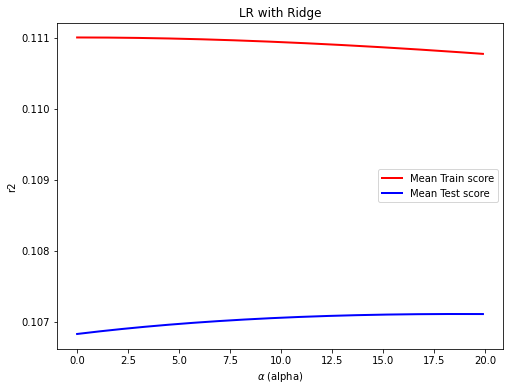

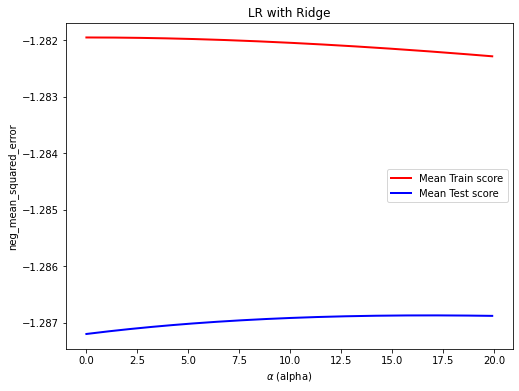

In [16]:
ridge = Ridge()
alphas = np.arange(0, 20, 0.1)
params = {'alpha': alphas}
result_r2, result_mse = param_tuning(ridge, X_test,y_test, params, n=5)
result_plot(alphas, result_r2)
result_plot(alphas, result_mse)

In [17]:
# according to tunning result of MSE score, the best parameter is when alpha = 16.8
ridge_tunned = Ridge(alpha=16.8)
ridge_result = stats_result(ridge_tunned, X_test,y_test)
print_stats_result(ridge_result)

Ridge(alpha=16.8)
===========================Score============================
MSE          1.2826
R-squared    0.1106
dtype: float64
==================Coefficients Statistics===================
                  Coefficient  Standard Error  t-value  Prob(>|t|)
Intercept              2.8420          0.2514  11.3044      0.0000
colony_ever            0.0543          0.1184   0.4585      0.6466
contiguity             0.3788          0.0613   6.1771      0.0000
member_wto_joint       0.2410          0.0405   5.9531      0.0000
common_language        0.0602          0.1161   0.5181      0.6044
agree_fta              0.8339          0.0737  11.3201      0.0000
distance_log          -0.3064          0.0289 -10.6023      0.0000
============Predictors We Can Reject (P < 0.05)=============
                  Coefficient  Standard Error  t-value  Prob(>|t|)
Intercept              2.8420          0.2514  11.3044         0.0
contiguity             0.3788          0.0613   6.1771         0.0
member_

# Lasso Regression

C:\Users\konda\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\konda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\konda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3976.953857421875, tolerance: 0.8943755626678467
  model = cd_fast.enet_coordinate_descent(
C:\Users\konda\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.b

r2: 0.107
best config: {'alpha': 0.0}
neg_mean_squared_error: -1.287
best config: {'alpha': 0.0}


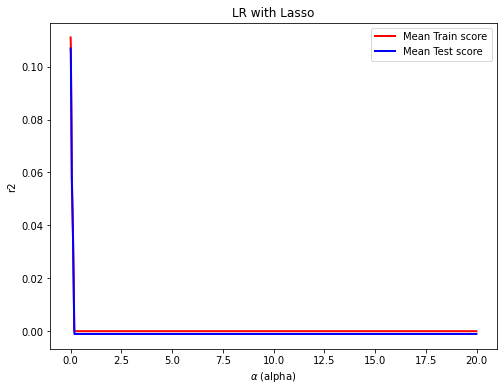

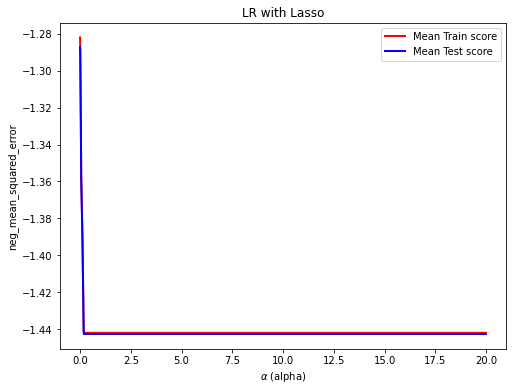

In [18]:
lasso = Lasso()
alphas = np.arange(0, 20, 0.01)
params = {'alpha': alphas}
result_r2, result_mse = param_tuning(lasso, X_test,y_test, params, n=5)
result_plot(alphas, result_r2)
result_plot(alphas, result_mse)

In [19]:
#according to tunning result of MSE score, the best parameter is when alpha = 0.0
lasso = Lasso(alpha=0.0)
lasso_result = stats_result(lasso, X_test,y_test)
print_stats_result(lasso_result)

Lasso(alpha=0.0)
===========================Score============================
MSE          1.2825
R-squared    0.1107
dtype: float64
==================Coefficients Statistics===================
                  Coefficient  Standard Error  t-value  Prob(>|t|)
Intercept              2.8291          0.2514  11.2537      0.0000
colony_ever            0.0379          0.1184   0.3204      0.7487
contiguity             0.3933          0.0613   6.4145      0.0000
member_wto_joint       0.2556          0.0405   6.3123      0.0000
common_language        0.0489          0.1161   0.4212      0.6736
agree_fta              0.8933          0.0737  12.1277      0.0000
distance_log          -0.3065          0.0289 -10.6065      0.0000
============Predictors We Can Reject (P < 0.05)=============
                  Coefficient  Standard Error  t-value  Prob(>|t|)
Intercept              2.8291          0.2514  11.2537         0.0
contiguity             0.3933          0.0613   6.4145         0.0
member_w

<ipython-input-10-d6230dc26938>:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X, y)
C:\Users\konda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\konda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3976.953857421875, tolerance: 0.8943755626678467
  model = cd_fast.enet_coordinate_descent(


# Elastic Net

In [20]:
elasticnet = ElasticNet()
alphas = np.arange(0, 2, 0.1)
l1_ratio = np.arange(0, 1, 0.1)
params = {'alpha': alphas, 'l1_ratio':l1_ratio}
result_r2, result_mse = param_tuning(elasticnet, X_test,y_test, params, n=5)

C:\Users\konda\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\konda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\konda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3976.953857421875, tolerance: 0.8943755626678467
  model = cd_fast.enet_coordinate_descent(
C:\Users\konda\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.b

In [21]:
print("%s: %.3f" % (result_r2.scoring, result_r2.best_score_))
print("best config: %s" % result_r2.best_params_)
print("%s: %.3f" % (result_mse.scoring, result_mse.best_score_))
print("best config: %s" % result_mse.best_params_)

r2: 0.107
best config: {'alpha': 0.0, 'l1_ratio': 0.0}
neg_mean_squared_error: -1.287
best config: {'alpha': 0.0, 'l1_ratio': 0.0}


In [22]:
# according to tunning result of r^2 score, the best parameter is when alpha and l1 ratio are both 0.0
elasticnet = ElasticNet(alpha=0.0, l1_ratio=0.0)
elasticnet_result = stats_result(elasticnet, X_test,y_test)
print_stats_result(elasticnet_result)

<ipython-input-10-d6230dc26938>:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X, y)
C:\Users\konda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\konda\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3976.953857421875, tolerance: 0.8943755626678467
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.0, l1_ratio=0.0)
===========================Score============================
MSE          1.2825
R-squared    0.1107
dtype: float64
==================Coefficients Statistics===================
                  Coefficient  Standard Error  t-value  Prob(>|t|)
Intercept              2.8291          0.2514  11.2537      0.0000
colony_ever            0.0379          0.1184   0.3204      0.7487
contiguity             0.3933          0.0613   6.4145      0.0000
member_wto_joint       0.2556          0.0405   6.3123      0.0000
common_language        0.0489          0.1161   0.4212      0.6736
agree_fta              0.8933          0.0737  12.1277      0.0000
distance_log          -0.3065          0.0289 -10.6065      0.0000
============Predictors We Can Reject (P < 0.05)=============
                  Coefficient  Standard Error  t-value  Prob(>|t|)
Intercept              2.8291          0.2514  11.2537         0.0
contiguity             0.3933          0.0613   6.4145  

# Random Forest

In [23]:
# increase trees up to 200 to see how prediction changes (test data)

rf = RandomForestRegressor(n_estimators = 200, random_state = 20)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
test_score = rf.score(X_test, y_test)
print(test_score)

0.19576228650652583


In [24]:
print('MAE: %f' % mean_absolute_error(y_test,pred)) #RMSE
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, pred))) #RMSE
print('R2 %f' % r2_score(y_test, pred))

MAE: 0.607070
RMSE: 1.076927
R2 0.195762


In [25]:
#Random Forest Coesfficients

rf.feature_importances_
CoeffRF = pd.DataFrame(columns=["Variable","FeatureImportance"])
CoeffRF["Variable"]=X_train.columns
CoeffRF["FeatureImportance"]=rf.feature_importances_
CoeffRF.sort_values("FeatureImportance", ascending = False)

,Variable,FeatureImportance
5,distance_log,0.751223
4,agree_fta,0.147145
0,colony_ever,0.027044
2,member_wto_joint,0.025765
1,contiguity,0.024524
3,common_language,0.024299


# Support Vector Classifier

In [26]:
# df is the dataframe with your data
# adding column trade_clf

Russia1 = pd.DataFrame(Russia)

Russia1['trade_clf'] = pd.Series(np.zeros(Russia1.shape[0]))

Russia1.loc[Russia1['trade']<=1, 'trade_clf'] = '-1'

Russia1.loc[Russia1['trade']>1, 'trade_clf'] = '1'

#Russia.head()


#Import svm model
from sklearn import svm


y = Russia1['trade_clf']
xmat = Russia1.drop(['trade','trade_log','distance','agree_pta','member_gatt_joint','trade_clf','distance_log'],axis=1)

X_train, X_test, y_train, y_test=train_test_split(xmat,y,test_size=0.3,random_state=3)

In [27]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8169945178974525


In [28]:
clf_train = round(clf.score(X_train, y_train) * 100, 2)
clf_test = round(clf.score(X_test, y_test) * 100, 2)
print(clf_train)
print(clf_test)

81.8
81.7


In [29]:
clf1 = svm.SVC(kernel='sigmoid') # Linear Kernel
#Train the model using the training sets
clf1.fit(X_train, y_train)

#Predict the response for test dataset
y_pred1 = clf1.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.8081264108352144


In [30]:
clf1_train = round(clf1.score(X_train, y_train) * 100, 2)
clf1_test = round(clf1.score(X_test, y_test) * 100, 2)
print(clf1_train)
print(clf1_test)

80.44
80.81


# Logistic Regression

Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution

In [31]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_test = round(logreg.score(X_test, y_test) * 100, 2)
print(log_train)
print(log_test)

82.09
82.31


# Support Vector Machines

SVMs are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier

In [32]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_test = round(svc.score(X_test, y_test) * 100, 2)
print(svc_train)
print(svc_test)

82.25
82.09


# K-Nearest Neighbors

The k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor

In [33]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_test = round(knn.score(X_test, y_test) * 100, 2)
print(knn_train)
print(knn_test)

81.66
81.46


# Gaussian Naive Bayes

The naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem

In [34]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
gaussian_train = round(gaussian.score(X_train, y_train) * 100, 2)
gaussian_test = round(gaussian.score(X_test, y_test) * 100, 2)
print(gaussian_train)
print(gaussian_test)

79.47
79.06


# Perceptron

The perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time.

In [35]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
perceptron_train = round(perceptron.score(X_train, y_train) * 100, 2)
perceptron_test = round(perceptron.score(X_test, y_test) * 100, 2)
print(perceptron_train)
print(perceptron_test)

81.09
80.78


# Linear SVC

In [36]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
linear_svc_train = round(linear_svc.score(X_train, y_train) * 100, 2)
linear_svc_test = round(linear_svc.score(X_test, y_test) * 100, 2)
print(linear_svc_train)
print(linear_svc_test)

82.09
82.31


# Stochastic Gradient Descent

is a simple yet very efficient approach to fitting linear classifiers and regressors under convex loss functions such as (linear) Support Vector Machines and Logistic Regression

In [37]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
sgd_train = round(sgd.score(X_train, y_train) * 100, 2)
sgd_test = round(sgd.score(X_test, y_test) * 100, 2)
print(sgd_train)
print(sgd_test)

81.8
81.7


# Decision Tree

The model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees.

In [38]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
decision_tree_train = round(decision_tree.score(X_train, y_train) * 100, 2)
decision_tree_test = round(decision_tree.score(X_test, y_test) * 100, 2)
print(decision_tree_train)
print(decision_tree_test)

82.25
82.09


# Random Forest

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [39]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_test = round(random_forest.score(X_test, y_test) * 100, 2)
print(random_forest_train)
print(random_forest_test)

82.25
82.17


In [40]:
# Train Score Summary

models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [svc_train, knn_train, log_train, 
              random_forest_train, gaussian_train, perceptron_train, 
              sgd_train, linear_svc_train, decision_tree_train]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,82.25
3,Random Forest,82.25
8,Decision Tree,82.25
2,Logistic Regression,82.09
7,Linear SVC,82.09
6,Stochastic Gradient Decent,81.80
1,KNN,81.66
5,Perceptron,81.09
4,Naive Bayes,79.47


In [41]:
# Test Score Summary

models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [svc_test, knn_test, log_test, random_forest_test, gaussian_test, 
              perceptron_test, sgd_test, linear_svc_test, decision_tree_test]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Logistic Regression,82.31
7,Linear SVC,82.31
3,Random Forest,82.17
0,Support Vector Machines,82.09
8,Decision Tree,82.09
6,Stochastic Gradient Decent,81.70
1,KNN,81.46
5,Perceptron,80.78
4,Naive Bayes,79.06
